In [ ]:
from PIL import Image
import torch
import numpy as np
import cv2
import albumentations as A
from torch.utils.data import Dataset
from shapely.geometry import Polygon
from numba import njit
import matplotlib.pyplot as plt
import os.path as osp
import math
import json
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.20 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [3]:
# dataset 지정 및 idx 
# '/data/ephemeral/home/data/vietnamese_receipt'
# '/data/ephemeral/home/data/japanese_receipt'
# '/data/ephemeral/home/data/thai_receipt'
# '/data/ephemeral/home/data/chinese_receipt'


dataset_dir = '/data/ephemeral/home/data/vietnamese_receipt'

# 알고 싶은 이미지를 정한다.

img_name='extractor.vi.in_house.appen_001015_page0001.jpg' 
ufo_fpath=osp.join(dataset_dir,'ufo/train.json')

with open(ufo_fpath,'r') as f:
    ufo_anno=json.load(f)

In [7]:
sample_ids=sorted(ufo_anno['images'])
img_idx=sample_ids.index(img_name)
print(sample_ids[img_idx])

extractor.vi.in_house.appen_001015_page0001.jpg


In [8]:
first_sample_id=sample_ids[img_idx]
print(len(ufo_anno['images'][first_sample_id]['words']))
print(ufo_anno['images'][first_sample_id]['words'])

128
{'0001': {'transcription': '1[Receipt]', 'points': [[511.007254, 527.050074], [800.560879, 519.175934], [800.918794, 552.819989], [511.365169, 561.409961]]}, '0002': {'transcription': 'Rice', 'points': [[260.73918, 637.099512], [329.430726, 646.999176], [330.036828, 674.879862], [260.537146, 667.808673]]}, '0003': {'transcription': 'City', 'points': [[346.292901, 644.648043], [415.564841, 644.648043], [415.564841, 680.387948], [346.292901, 680.387948]]}, '0004': {'transcription': '16/MAR/2024', 'points': [[263.324294, 675.862602], [450.448147, 687.641182], [451.661658, 720.009004], [262.21088334384103, 718.7289316759051]]}, '0005': {'transcription': '11:43', 'points': [[468.995323, 689.218379], [551.667619, 689.218379], [551.667619, 718.998185], [468.995323, 718.998185]]}, '0006': {'transcription': 'AM', 'points': [[567.001996, 688.107192], [601.448786, 688.107192], [601.448786, 717.220285], [567.001996, 717.220285]]}, '0007': {'transcription': 'CON01', 'points': [[634.168999, 684.

In [9]:
sample_id=sample_ids[img_idx]
img_fpath=osp.join(dataset_dir,'img/train',sample_id)
print(img_fpath)

/data/ephemeral/home/data/vietnamese_receipt/img/train/extractor.vi.in_house.appen_001015_page0001.jpg


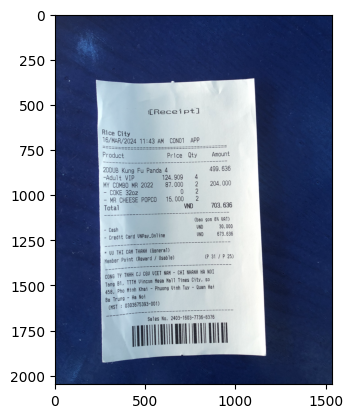

In [10]:
image=cv2.imread(img_fpath)
plt.imshow(image)

In [11]:
bboxes=[]
for word_info in ufo_anno['images'][sample_id]['words'].values():
    if len(word_info['points'])>4:
        continue

    bboxes.append(np.array(word_info['points']))
bboxes=np.array(bboxes,dtype=np.float32)

(-0.5, 1535.5, 2047.5, -0.5)

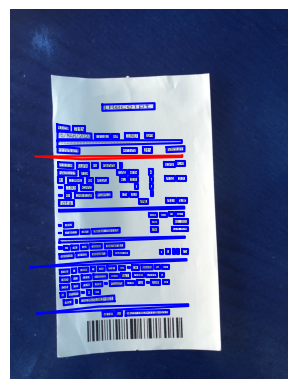

In [ ]:
# 특정 박스가 어디에 위치해 있는지 알고 싶을 때
# 박스중에 몇 번째 박스가 어디에 위치해 있는지 알고 싶을 때
box_idx=14
ax=None
ax = ax or plt
for i,word in enumerate(bboxes):
    if i==box_idx:
        ax.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="red")
    else:
        ax.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="blue")
ax.imshow(image)
ax.axis("off")
